# Big-Data & FinTech: Stock Market in Python

This machine learning project is about clustering similar companies with K-means clustering algorithm for trading purposes. The similarity is based on daily stock movements.
The necessary packages are imported.


In [1]:
#Install Package
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=b0bf95497774500b666cc9d8236a4f45a00b88dc0ce52ae2f78c89ef06d8b736
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


A dictionary ‘companies_dict’ is defined where ‘key’ is company’s name and ‘value’ is company’s stock code. 28 companies are considered, 3 are not listed currently.

In [2]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Sony':'SONY',  # Updated
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Gen Digital':'GEN'  # Updated ticker
}


## IMPORT THE DATA

Stock market data is extracted from yahoo finance. The time period considered is from ‘2021–01–01’ to today. The stock movement of companies would be compared based on these 6 parameters :- ‘High’, ‘Low’, ‘Open’, ‘Close’,

* ‘Volume’, ‘Adj Close’.
* ‘High’ :- Highest price during the day.
* ‘Low’ :- Lowest price during the day.
* ‘Open’ :- Opening price of the day.
* ‘Close’ :- Closing price of the day.
* ‘Volume’ :- Total number of shares of stock traded during the day.
* ‘Adj Close’ :- The closing price is amended to account for any corporate actions to give the ‘Adjusted closing’ price.


In [3]:
from datetime import datetime
# Define a start date and End Date
start = '2021-01-01'
#setting today date as End Date
end = datetime.today().strftime('%Y-%m-%d')
data_source ='yahoo' # Source of data is yahoo finance.
p =  yf.download(list(companies_dict.values()), start, end)


[*********************100%***********************]  26 of 26 completed


In [4]:
p # p is the dataframe

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN         AXP          BA   
Date                                                                        
2021-01-04 00:00:00+00:00  126.683434  159.331497  112.164032  202.720001   
2021-01-05 00:00:00+00:00  128.249725  160.925507  112.762665  211.630005   
2021-01-06 00:00:00+00:00  123.932640  156.919006  116.934135  211.029999   
2021-01-07 00:00:00+00:00  128.161575  158.108002  116.009186  212.710007   
2021-01-08 00:00:00+00:00  129.267853  159.134995  116.123604  209.899994   
...                               ...         ...         ...         ...   
2024-10-03 00:00:00+00:00  225.669998  181.960007  267.889984  150.520004   
2024-10-04 00:00:00+00:00  226.800003  186.509995  275.970001  155.000000   
2024-10-07 00:00:00+00:00  221.690002  180.800003  273.790009  155.910004   
2024-10-08 00:00:00+00:00  225.770004  182.720001  269.109985  154.649994   
2024-10-09 00:00:00+00:00  229.539993  185.169998  271.420013  149.369995   

Price                                                                    \
Ticker                           BAC         CVX          F          GE   
Date                                                                      
2021-01-04 00:00:00+00:00  27.381516   72.398842   7.037916   51.385967   
2021-01-05 00:00:00+00:00  27.591230   74.356026   7.145302   52.858341   
2021-01-06 00:00:00+00:00  29.314547   76.749115   7.302250   55.754021   
2021-01-07 00:00:00+00:00  29.961929   77.108070   7.483981   55.312290   
2021-01-08 00:00:00+00:00  29.661030   77.843094   7.434418   55.655853   
...                              ...         ...        ...         ...   
2024-10-03 00:00:00+00:00  39.250000  151.250000  10.450000  183.889999   
2024-10-04 00:00:00+00:00  40.110001  150.740005  10.570000  187.080002   
2024-10-07 00:00:00+00:00  39.959999  151.119995  10.490000  185.960007   
2024-10-08 00:00:00+00:00  39.930000  148.750000  10.490000  187.470001   
2024-10-09 00:00:00+00:00  40.189999  149.649994  10.620000  189.279999   

Price                                            ...   Volume            \
Ticker                           GEN        HMC  ...      MCD      MSFT   
Date                                             ...                      
2021-01-04 00:00:00+00:00  19.126041  25.206482  ...  4055400  37130100   
2021-01-05 00:00:00+00:00  19.310209  25.061201  ...  2576100  23823000   
2021-01-06 00:00:00+00:00  19.264166  25.642326  ...  3083400  35930700   
2021-01-07 00:00:00+00:00  19.448341  25.578768  ...  3142000  27694500   
2021-01-08 00:00:00+00:00  19.374678  25.587847  ...  2639100  22956200   
...                              ...        ...  ...      ...       ...   
2024-10-03 00:00:00+00:00  26.969999  31.770000  ...  1802500  13686400   
2024-10-04 00:00:00+00:00  27.490000  32.619999  ...  2432400  19169700   
2024-10-07 00:00:00+00:00  27.290001  32.070000  ...  2091800  20919800   
2024-10-08 00:00:00+00:00  27.410000  31.990000  ...  2038300  19229300   
2024-10-09 00:00:00+00:00  27.590000  31.450001  ...  1854100  14876300   

Price                                                                  \
Ticker                         NOC      PEP     SONY      TM      TXN   
Date                                                                    
2021-01-04 00:00:00+00:00  1267500  7486900  5320000  315600  4659900   
2021-01-05 00:00:00+00:00   939900  4126000  5593500  231800  4734100   
2021-01-06 00:00:00+00:00   952500  4843300  4907500  296100  5254400   
2021-01-07 00:00:00+00:00  1331000  4473200  3803500  345000  5673600   
2021-01-08 00:00:00+00:00  2090300  4312000  7002000  418100  4556500   
...                            ...      ...      ...     ...      ...   
2024-10-03 00:00:00+00:00   443700  5090300  2312000  394700  3167000   
2024-10-04 00:00:00+00:00   393900  4390100  2291500  309500  4092900   
2024-10-07 00:00

In [5]:
p.columns # printing the columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'CVX'),
            ('Adj Close',    'F'),
            ('Adj Close',   'GE'),
            ('Adj Close',  'GEN'),
            ('Adj Close',  'HMC'),
            ...
            (   'Volume',  'MCD'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'NOC'),
            (   'Volume',  'PEP'),
            (   'Volume', 'SONY'),
            (   'Volume',   'TM'),
            (   'Volume',  'TXN'),
            (   'Volume',  'VLO'),
            (   'Volume',  'WBA'),
            (   'Volume',  'XOM')],
           names=['Price', 'Ticker'], length=156)

In [6]:
#print the column open in p - Transposed
p['Open'].T

Date,2021-01-04 00:00:00+00:00,2021-01-05 00:00:00+00:00,2021-01-06 00:00:00+00:00,2021-01-07 00:00:00+00:00,2021-01-08 00:00:00+00:00,2021-01-11 00:00:00+00:00,2021-01-12 00:00:00+00:00,2021-01-13 00:00:00+00:00,2021-01-14 00:00:00+00:00,2021-01-15 00:00:00+00:00,...,2024-09-26 00:00:00+00:00,2024-09-27 00:00:00+00:00,2024-09-30 00:00:00+00:00,2024-10-01 00:00:00+00:00,2024-10-02 00:00:00+00:00,2024-10-03 00:00:00+00:00,2024-10-04 00:00:00+00:00,2024-10-07 00:00:00+00:00,2024-10-08 00:00:00+00:00,2024-10-09 00:00:00+00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,133.520004,128.889999,127.720001,128.360001,132.429993,129.190002,128.500000,128.759995,130.800003,128.779999,...,227.300003,228.460007,230.039993,229.520004,225.889999,225.139999,227.899994,224.500000,224.300003,225.229996
AMZN,163.500000,158.300507,157.324005,157.850006,159.000000,157.400497,156.000000,156.421997,158.376007,156.151001,...,194.309998,190.679993,187.139999,184.899994,184.440002,183.050003,185.750000,182.949997,181.919998,182.820007
AXP,121.300003,118.260002,121.000000,124.099998,122.070000,120.419998,122.000000,121.599998,122.650002,122.480003,...,268.290009,268.000000,270.100006,271.279999,268.600006,269.640015,272.250000,274.350006,271.250000,268.809998
BA,210.000000,204.740005,210.220001,213.389999,213.610001,203.029999,206.649994,207.149994,208.789993,208.960007,...,153.940002,155.369995,154.789993,151.460007,153.759995,152.119995,152.259995,155.000000,155.990005,152.050003
BAC,30.459999,30.170000,31.900000,33.310001,32.919998,32.090000,33.419998,33.430000,33.480000,33.290001,...,39.389999,39.650002,39.230000,39.509998,39.250000,38.980000,39.930000,40.209999,40.049999,39.869999
CVX,85.150002,85.489998,89.000000,90.389999,92.080002,89.120003,92.660004,93.199997,93.940002,94.220001,...,140.899994,142.979996,145.369995,146.350006,151.679993,151.309998,152.479996,151.500000,149.199997,147.509995
F,8.810000,8.470000,8.790000,8.940000,9.100000,8.870000,9.300000,9.910000,9.810000,10.040000,...,10.560000,10.840000,10.480000,10.720000,10.730000,10.410000,10.590000,10.550000,10.500000,10.490000
GE,54.277229,51.984528,53.978180,57.616600,56.270882,55.373737,57.367393,58.713108,57.865807,57.815964,...,189.399994,184.169998,185.080002,187.490005,185.570007,186.500000,186.580002,185.940002,187.619995,186.630005
GEN,20.930000,20.860001,20.580000,21.020000,21.240000,20.990000,21.040001,21.400000,20.809999,20.309999,...,26.879999,27.190001,27.469999,27.500000,27.040001,26.950001,27.290001,27.459999,27.299999,27.459999


In [7]:
p['Open'] # printing the 'Open' column to observe

Ticker,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,GEN,HMC,...,MCD,MSFT,NOC,PEP,SONY,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,133.520004,163.500000,121.300003,210.000000,30.459999,85.150002,8.81,54.277229,20.930000,28.000000,...,214.490005,222.529999,304.070007,147.009995,20.299999,155.809998,164.600006,57.029999,40.169998,41.450001
2021-01-05 00:00:00+00:00,128.889999,158.300507,118.260002,204.740005,30.170000,85.489998,8.47,51.984528,20.860001,27.450001,...,210.179993,217.259995,295.250000,144.070007,20.403999,151.910004,161.699997,56.150002,41.500000,41.840000
2021-01-06 00:00:00+00:00,127.720001,157.324005,121.000000,210.220001,31.900000,89.000000,8.79,53.978180,20.580000,28.049999,...,211.300003,212.169998,293.980011,141.669998,20.091999,152.710007,162.300003,58.660000,42.209999,44.410000
2021-01-07 00:00:00+00:00,128.360001,157.850006,124.099998,213.389999,33.310001,90.389999,8.94,57.616600,21.020000,28.219999,...,213.220001,214.039993,296.820007,142.809998,20.216000,151.660004,165.330002,59.070000,44.040001,45.000000
2021-01-08 00:00:00+00:00,132.429993,159.000000,122.070000,213.610001,32.919998,92.080002,9.10,56.270882,21.240000,28.309999,...,212.899994,218.679993,292.600006,142.470001,20.658001,153.600006,171.119995,60.189999,45.049999,45.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03 00:00:00+00:00,225.139999,183.050003,269.640015,152.119995,38.980000,151.309998,10.41,186.500000,26.950001,31.820000,...,303.500000,417.630005,539.849976,168.139999,18.798000,176.919998,201.080002,135.839996,8.630000,121.900002
2024-10-04 00:00:00+00:00,227.899994,185.750000,272.250000,152.259995,39.930000,152.479996,10.59,186.580002,27.290001,32.139999,...,303.049988,418.239990,535.820007,167.149994,18.860001,178.300003,206.100006,145.199997,8.850000,123.199997
2024-10-07 00:00:00+00:00,224.500000,182.949997,274.350006,155.000000,40.209999,151.500000,10.55,185.940002,27.459999,32.270000,...,303.760010,416.000000,536.260010,167.720001,19.122000,177.789993,200.589996,142.009995,8.770000,125.250000


Numpy arrays are more convenient. So ‘stock_open’ and ‘stock_close’ are defined as follows :-

In [26]:
stock_open = np.array(p['Open']).T
# stock_open is numpy array of transpose of p['Open']
stock_close = np.array(p['Close']).T # stock_close is numpy array of transpose of p['Close']
# print the stock close column

In [27]:
print(stock_open)

[[133.52000427 128.88999939 127.72000122 ... 224.5        224.30000305
  225.22999573]
 [163.5        158.30050659 157.32400513 ... 182.94999695 181.91999817
  182.82000732]
 [121.30000305 118.26000214 121.         ... 274.3500061  271.25
  268.80999756]
 ...
 [ 57.02999878  56.15000153  58.65999985 ... 142.00999451 142.02000427
  135.52999878]
 [ 40.16999817  41.5         42.20999908 ...   8.77000046   8.81999969
    9.03999996]
 [ 41.45000076  41.84000015  44.40999985 ... 125.25       123.87999725
  120.90000153]]


In [28]:
print(stock_close)

[[129.41000366 131.00999451 126.59999847 ... 221.69000244 225.77000427
  229.53999329]
 [159.33149719 160.92550659 156.91900635 ... 180.80000305 182.72000122
  185.16999817]
 [118.04000092 118.66999817 123.05999756 ... 273.79000854 269.10998535
  271.42001343]
 ...
 [ 55.72999954  57.31999969  58.59999847 ... 143.97999573 136.33999634
  139.36000061]
 [ 41.40000153  41.15999985  43.02999878 ...   8.86999989   9.07999992
    8.90999985]
 [ 41.5         43.5         44.61000061 ... 125.37000275 122.04000092
  122.08999634]]


## CALCULATE MOVEMENTS




Movement’ is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).

In [30]:
movements = stock_close - stock_open
print(movements)

[[-4.11000061  2.11999512 -1.12000275 ... -2.80999756  1.47000122
   4.30999756]
 [-4.16850281  2.625      -0.40499878 ... -2.1499939   0.80000305
   2.34999084]
 [-3.26000214  0.40999603  2.05999756 ... -0.55999756 -2.14001465
   2.61001587]
 ...
 [-1.29999924  1.16999817 -0.06000137 ...  1.97000122 -5.68000793
   3.83000183]
 [ 1.23000336 -0.34000015  0.81999969 ...  0.09999943  0.26000023
  -0.13000011]
 [ 0.04999924  1.65999985  0.20000076 ...  0.12000275 -1.83999634
   1.18999481]]


‘sum_of_movement’ of a company is defined as sum of differences of closing and opening prices of all days. The company and its ‘sum_of_movement’ is printed

In [31]:
sum_of_movement = np.sum(movements,1)
for i in range(len(sum_of_movement)):
 print('company:{}, Change:{}'.format(p['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:136.92984008789062
company:AMZN, Change:-43.87538146972656
company:AXP, Change:56.17974090576172
company:BA, Change:-22.050003051757812
company:BAC, Change:2.0900115966796875
company:CVX, Change:6.400062561035156
company:F, Change:0.8499851226806641
company:GE, Change:76.35735321044922
company:GEN, Change:6.280045509338379
company:HMC, Change:0.09007072448730469
company:IBM, Change:102.00798797607422
company:INTC, Change:-14.309999465942383
company:JNJ, Change:24.629959106445312
company:KO, Change:-0.8399925231933594
company:LMT, Change:122.95016479492188
company:MA, Change:113.3406982421875
company:MCD, Change:35.31971740722656
company:MSFT, Change:40.43013000488281
company:NOC, Change:160.7703857421875
company:PEP, Change:-28.9600830078125
company:SONY, Change:-4.328028678894043
company:TM, Change:-22.369949340820312
company:TXN, Change:-0.7000885009765625
company:VLO, Change:2.049976348876953
company:WBA, Change:-31.71997833251953
company:XOM, Change:64.31988525

If we have positive ‘sum_of_movement’. Hence it is advisable to go long(buy) on these stocks.
If we‘have negative ‘sum_of_movement’. Hence it is advisable to short(sell) the stocks.


## VISUALIZING THE DATA

The variation of opening prices of 2 companies(Amazon and Apple) have been plotted below.

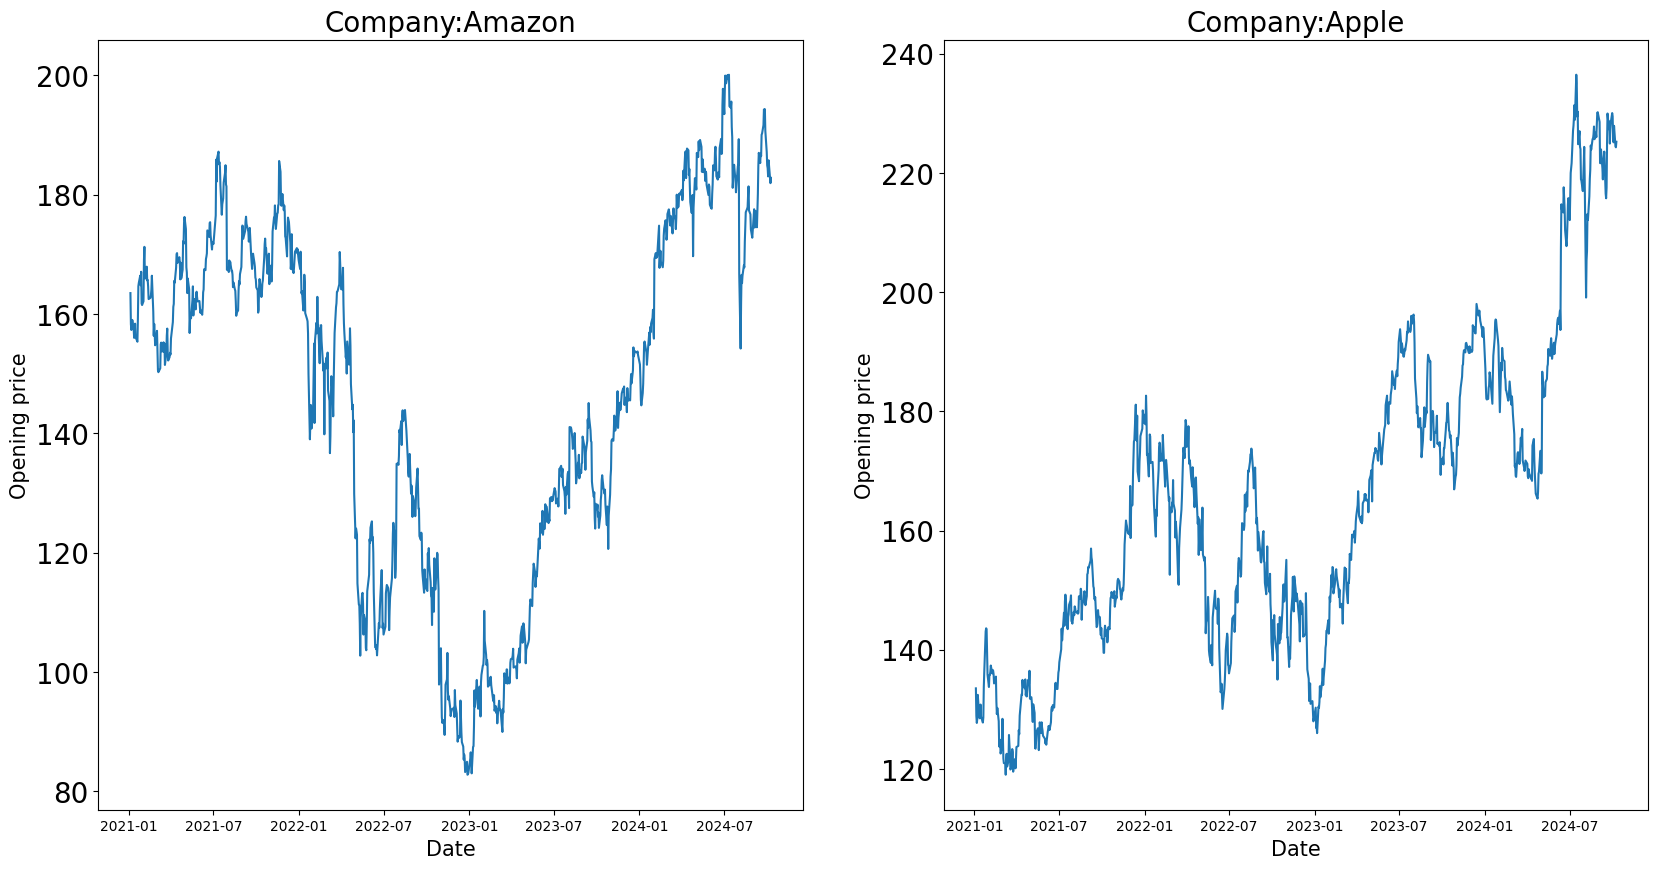

In [11]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(p['Open']['AMZN'])
plt.subplot(1,2,2)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(p['Open']['AAPL'])


Apple has better growth than Amazon in the given time period.
Let us plot the opening and closing prices of Amazon in the time period from ‘2015–01–02’ to ‘2015–01–23’.


In [12]:
sum_of_movement

array([ 1.36929840e+02, -4.38753815e+01,  5.61797409e+01, -2.20500031e+01,
        2.09001160e+00,  6.40006256e+00,  8.49985123e-01,  7.63573532e+01,
        6.28004551e+00,  9.00707245e-02,  1.02007988e+02, -1.43099995e+01,
        2.46299591e+01, -8.39992523e-01,  1.22950165e+02,  1.13340698e+02,
        3.53197174e+01,  4.04301300e+01,  1.60770386e+02, -2.89600830e+01,
       -4.32802868e+00, -2.23699493e+01, -7.00088501e-01,  2.04997635e+00,
       -3.17199783e+01,  6.43198853e+01])

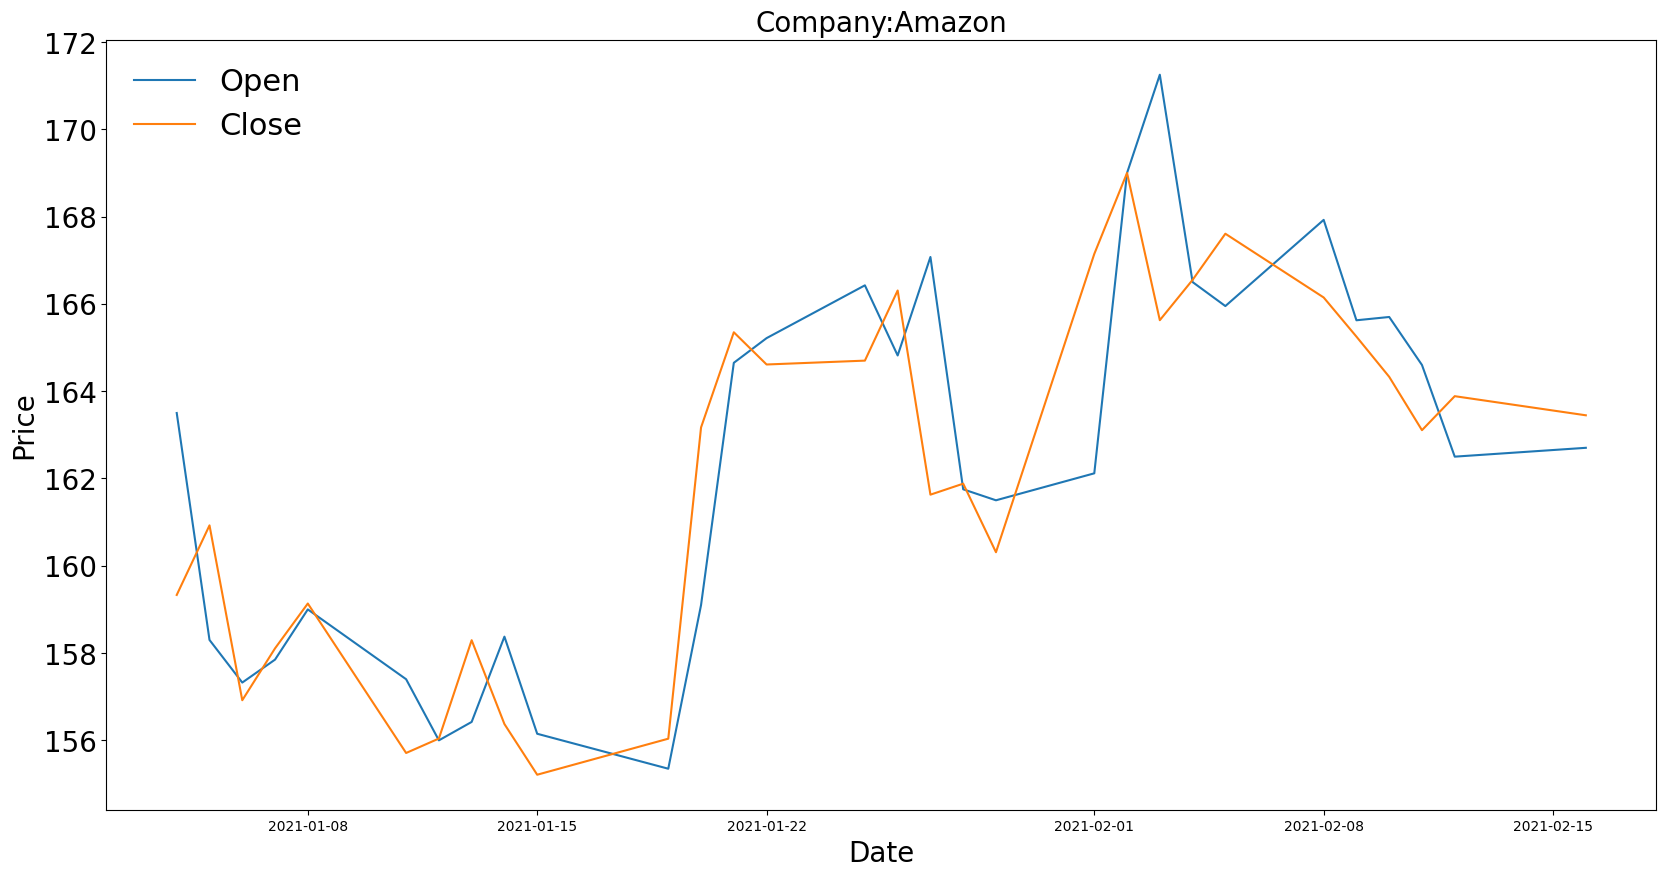

In [13]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(p.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(p.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

There is an overall increase in ‘Open’ and ‘Close’ prices over the 30 day time period which shows the company in a positive light.

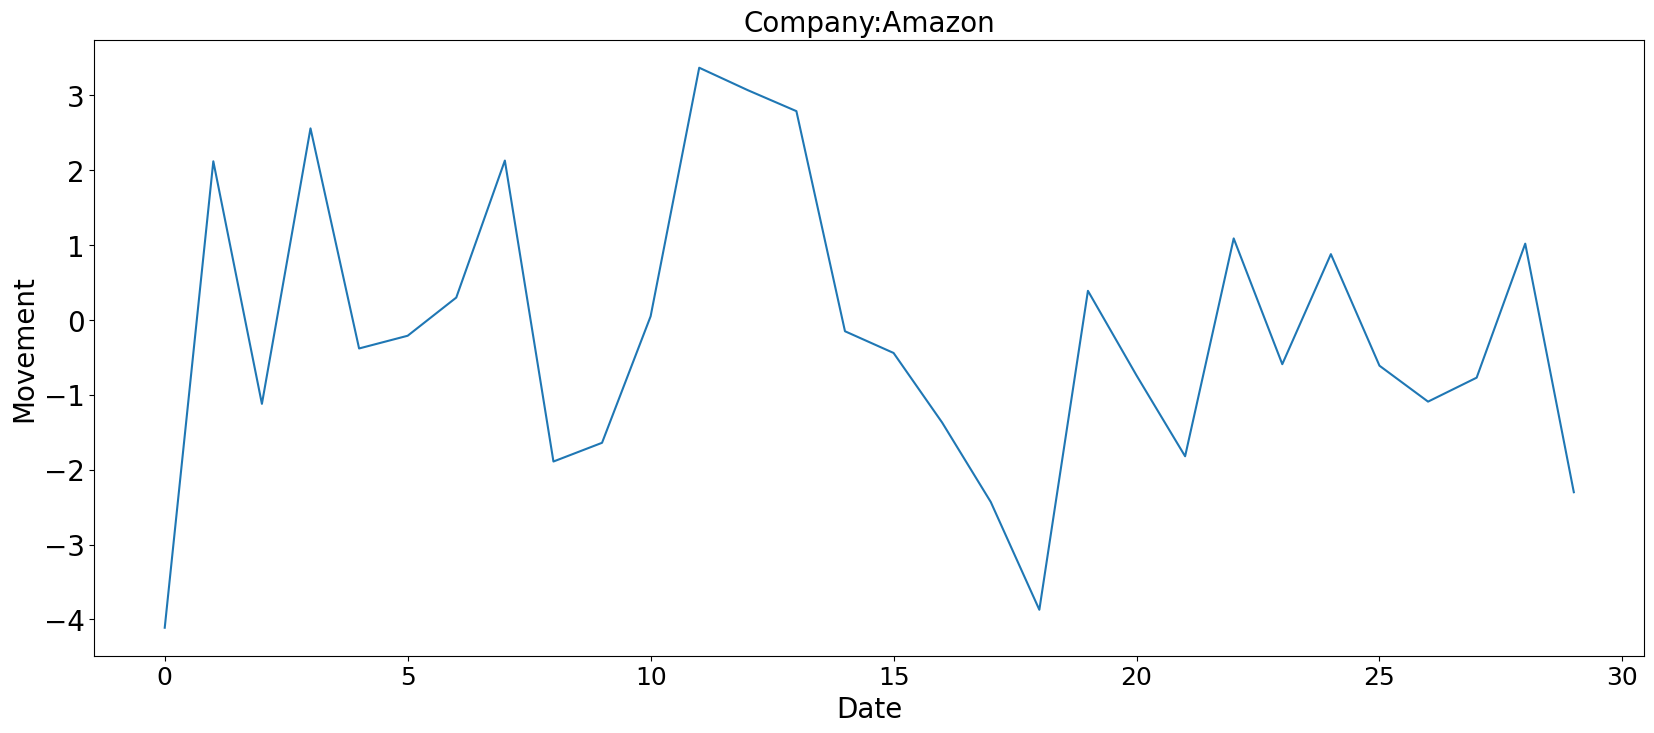

In [14]:
plt.figure(figsize = (20,8))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])


‘Movement’ as defined earlier is difference of closing and opening prices of a particular day. The variation of ‘movement’ of amazon in the time period is plotted below.

Positive ‘movement’ is desirable which suggests the price has increased during the day


Another important parameter is ‘Volume’.

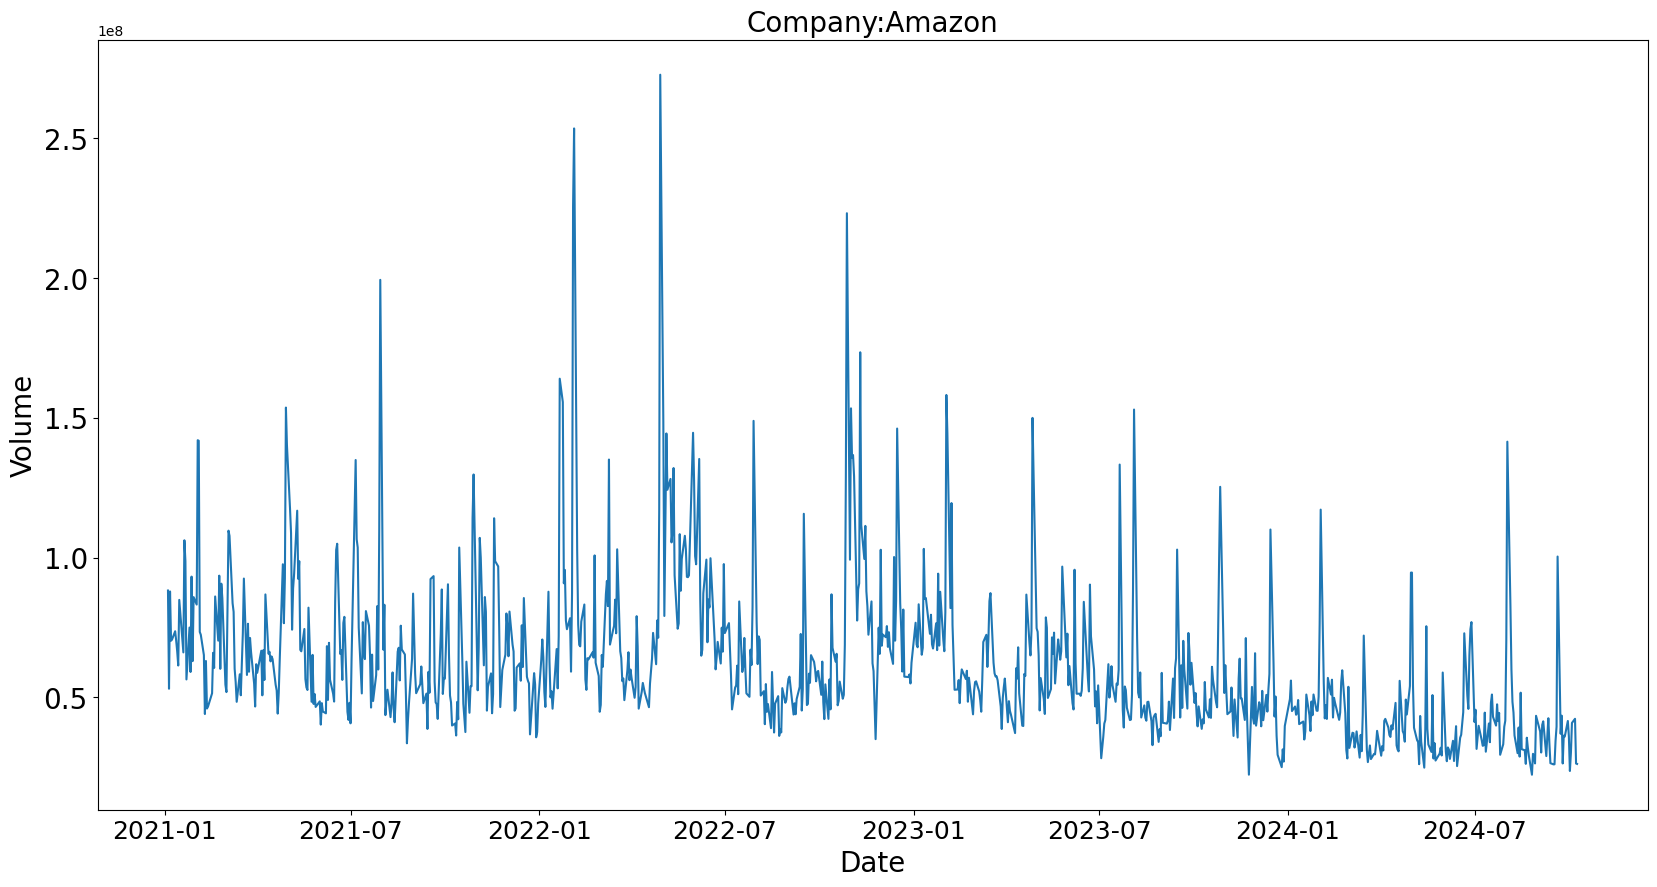

In [15]:
plt.figure(figsize = (20,10))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(p['Volume']['AMZN'],label = 'Open')


The peaks suggest there are high volumes of stocks traded on certain days. This may be due to restructuring of company’s management, change of ownership, yearly announcements, new ventures and other factors which affect the image of company in the minds of market participants.
The candlestick chart for the first 60 days of Amazon has been plotted below.


**CANDLESTICK CHART**

Candlestick pattern is an important tool of technical analysis of stocks to predict particular market movements. A green candlestick means that the opening price on that day was lower than the closing price that day (i.e. the price moved up during the day); a red candlestick means that the opening price was higher than the closing price that day (i.e. the price moved down during the day).

In [16]:
 fig = go.Figure(data=[go.Candlestick(x=p.index,
 open=p.iloc[0:60]['Open']['AMZN'],
 high=p.iloc[0:60]['High']['AMZN'],
 low=p.iloc[0:60]['Low']['AMZN'],
 close=p.iloc[0:60]['Close']['AMZN'])])
 fig.show()


# NEED FOR NORMALIZATION

Let us plot the variation of ‘movement’ of Amazon and Apple.
Stock prices of Amazon and Apple have different scales. Thus x units of change in stock price of Amazon is not the same as x units of change in stock price of Apple. Some companies are worth a lot more than other companies. Hence the data has to be normalized.
The goal of Normalization is to change the value of numeric columns in the dataset to a common scale without distorting differences in the range of values. It is required only when features have different ranges like in the present scenario.
‘norm_movements’ is defined as normalized version of ‘movements’. The Normalizer() rescales each row of ‘movements’ independently.First remove the nan or null values


In [32]:
movements
new_movements = movements[~np.isnan(movements)]
new_movements

from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(new_movements.reshape(-1,1))
# Fit and transform

In [1]:
# The minimum, maximum and mean value of ‘norm_movements’ is printed.
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())
plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0])
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

NameError: name 'norm_movements' is not defined

In [18]:
movements

array([[-4.11000061,  2.11999512, -1.12000275, ..., -2.80999756,
         1.47000122,  4.30999756],
       [-4.16850281,  2.625     , -0.40499878, ..., -2.1499939 ,
         0.80000305,  2.34999084],
       [-3.26000214,  0.40999603,  2.05999756, ..., -0.55999756,
        -2.14001465,  2.61001587],
       ...,
       [-1.29999924,  1.16999817, -0.06000137, ...,  1.97000122,
        -5.68000793,  3.83000183],
       [ 1.23000336, -0.34000015,  0.81999969, ...,  0.09999943,
         0.26000023, -0.13000011],
       [ 0.04999924,  1.65999985,  0.20000076, ...,  0.12000275,
        -1.83999634,  1.18999481]])

In [19]:
new_movements

array([-4.11000061,  2.11999512, -1.12000275, ...,  0.12000275,
       -1.83999634,  1.18999481])

# ADDITIONAL KNOWLEDGE - CLUSTERING

Material to refer
* What is clustering?
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/


## Apply a simple K-Means Clustering

In [25]:
# Install necessary packages if not already installed
!pip install yfinance scikit-learn matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Define the Companies and Download Data
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Sony':'SONY',  # Updated ticker
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Gen Digital':'GEN'  # Updated ticker for Symantec
}


# Define the start and end dates for data extraction
start_date = '2021-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# Download stock data
data = yf.download(list(companies_dict.values()), start=start_date, end=end_date)

# Step 2: Calculate Daily Movements
# Daily movement = Closing price - Opening price
movements = data['Close'] - data['Open']
movements = movements.T  # Transpose for easier manipulation by company

# Step 3: Normalize the Movements
# Remove any rows with NaN values
movements = movements.dropna()

# Normalize each company's movements to put them on a similar scale
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

# Step 4: Apply K-means Clustering
# Set the number of clusters
num_clusters = 3  # You can experiment with different values
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(norm_movements)

# Step 5: Analyze the Clustering Results
# Get cluster labels for each company
labels = kmeans.labels_

# Create a DataFrame to show each company with its assigned cluster
clustered_data = pd.DataFrame({
    'Company': movements.index,
    'Cluster': labels
})

# Print the companies in each cluster
for cluster in range(num_clusters):
    print(f"\nCluster {cluster + 1}:")
    print(clustered_data[clustered_data['Cluster'] == cluster]['Company'].values)

[*********************100%***********************]  26 of 26 completed



Cluster 1:
['AXP' 'BA' 'BAC' 'CVX' 'F' 'GE' 'HMC' 'IBM' 'TM' 'VLO' 'WBA' 'XOM']

Cluster 2:
['JNJ' 'KO' 'LMT' 'MCD' 'NOC' 'PEP']

Cluster 3:
['AAPL' 'AMZN' 'GEN' 'INTC' 'MA' 'MSFT' 'SONY' 'TXN']


[*********************100%***********************]  26 of 26 completed


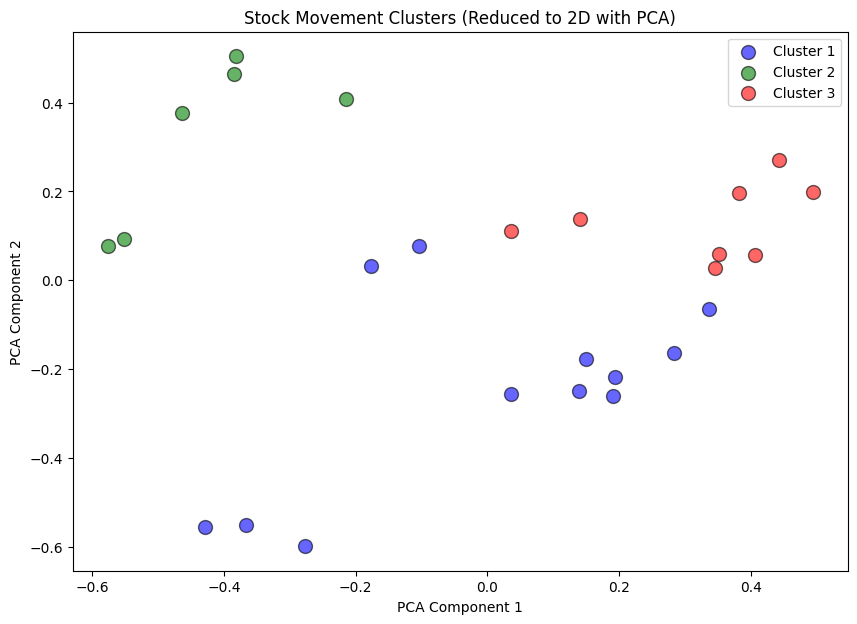

In [24]:
# Install necessary packages if not already installed
!pip install yfinance scikit-learn matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Define the Companies and Download Data
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Sony':'SONY',  # Updated ticker
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Gen Digital':'GEN'  # Updated ticker for Symantec
}

# Define the start and end dates for data extraction
start_date = '2021-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# Download stock data
data = yf.download(list(companies_dict.values()), start=start_date, end=end_date)

# Step 2: Calculate Daily Movements
# Daily movement = Closing price - Opening price
movements = data['Close'] - data['Open']
movements = movements.T  # Transpose for easier manipulation by company

# Step 3: Normalize the Movements
# Remove any rows with NaN values
movements = movements.dropna()

# Normalize each company's movements to put them on a similar scale
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

# Step 4: Apply K-means Clustering
# Set the number of clusters
num_clusters = 3  # You can experiment with different values
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(norm_movements)

# Get cluster labels for each company
labels = kmeans.labels_

# Step 5: Dimensionality Reduction for Visualization (PCA)
# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(norm_movements)

# Step 6: Scatter Plot of Clusters
plt.figure(figsize=(10, 7))

# Scatter plot each cluster with a unique color
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(num_clusters):
    plt.scatter(reduced_data[labels == i, 0],
                reduced_data[labels == i, 1],
                label=f'Cluster {i + 1}',
                c=colors[i],
                alpha=0.6,
                edgecolor='k',
                s=100)

plt.title("Stock Movement Clusters (Reduced to 2D with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
